In [1]:
import frustratometer
import seaborn as sns
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Measure Frustration of Complete PDB

In [2]:
#AWSEM parameters are chosen to be consistent with online AWSEM server
structure=frustratometer.Structure('./data/1r69.pdb',"A")
AWSEM_model=frustratometer.AWSEM(structure,k_electrostatics=0.0,min_sequence_separation_rho=3, min_sequence_separation_contact=2)

@> 997 atoms and 1 coordinate set(s) were parsed in 0.06s.
/Users/fajer/anaconda3/envs/openmm8/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1001
  warnings.warn(
@> 997 atoms and 1 coordinate set(s) were parsed in 0.01s.


[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]


In [3]:
print(AWSEM_model.native_energy())

-340.2426592037401


### Single Residue Frustration

Text(0.5, 0, 'Residue i')

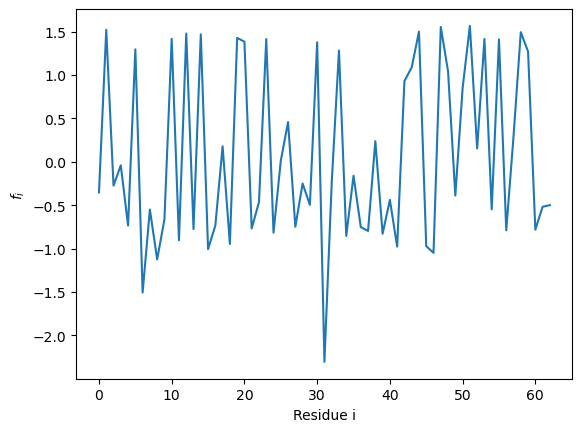

In [4]:
plt.plot(AWSEM_model.frustration(kind='singleresidue'))
plt.ylabel("$f_{i}$"); plt.xlabel("Residue i")

In [5]:
AWSEM_model.view_single_frustration(structure)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

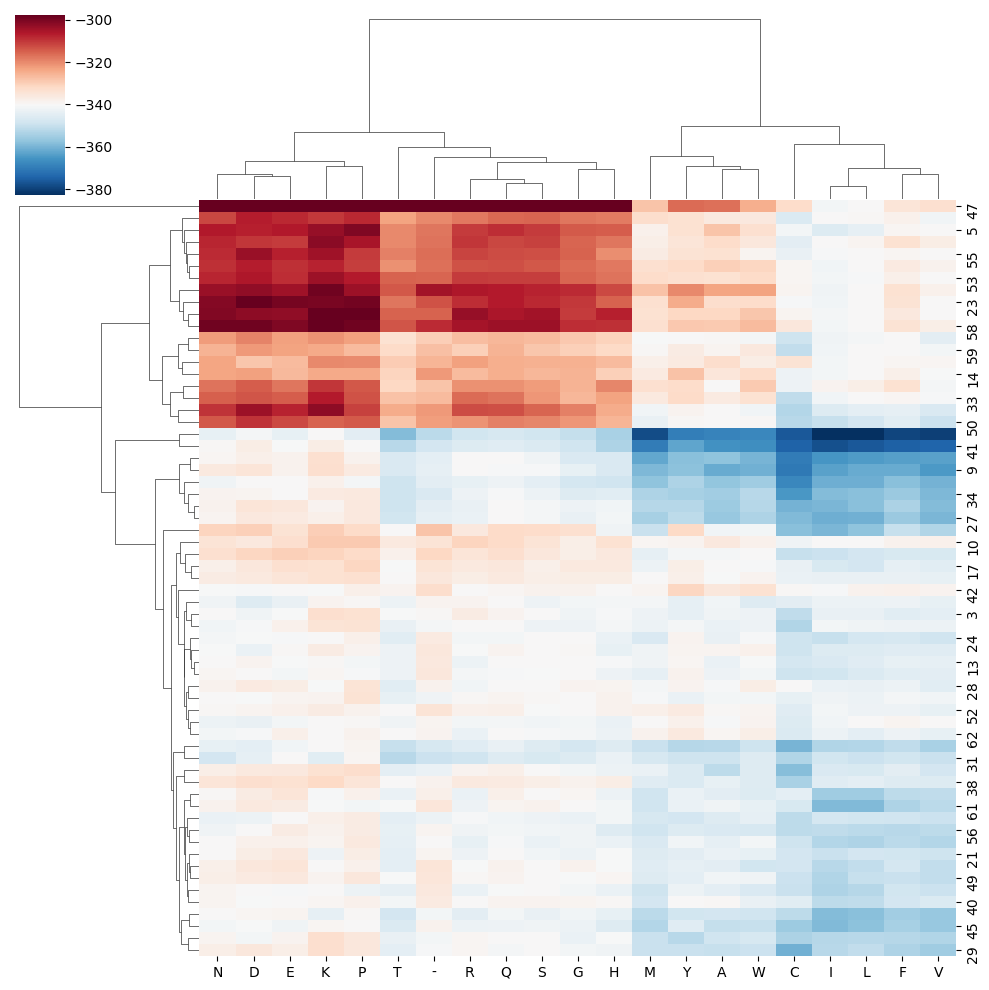

In [6]:
AWSEM_model.plot_decoy_energy(kind='singleresidue')

<AxesSubplot: >

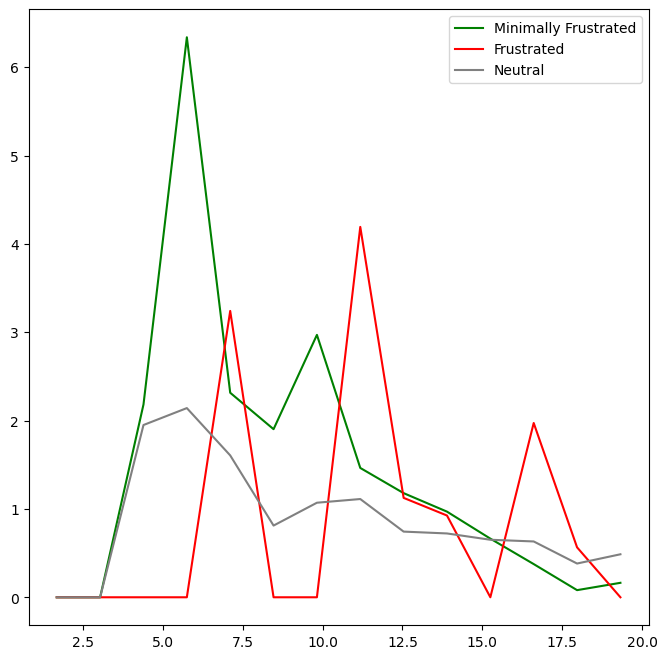

In [7]:
single_residue_pair_distribution_data=AWSEM_model.generate_frustration_pair_distribution(kind="singleresidue",bins=15)

plt.figure(figsize=(8,8))

sns.lineplot(x=single_residue_pair_distribution_data[-1],y=single_residue_pair_distribution_data[0],label="Minimally Frustrated",color="green")
sns.lineplot(x=single_residue_pair_distribution_data[-1],y=single_residue_pair_distribution_data[1],label="Frustrated",color="red")
sns.lineplot(x=single_residue_pair_distribution_data[-1],y=single_residue_pair_distribution_data[2],label="Neutral",color="gray")

### Mutational Frustration

In [8]:
AWSEM_model.view_pair_frustration(pair="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/frustratometer/frustration/frustration.py:716: RuntimeWarning: invalid value encountered in divide
  contact_frustration = -mean_energy / (std_energy + correction)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<AxesSubplot: >

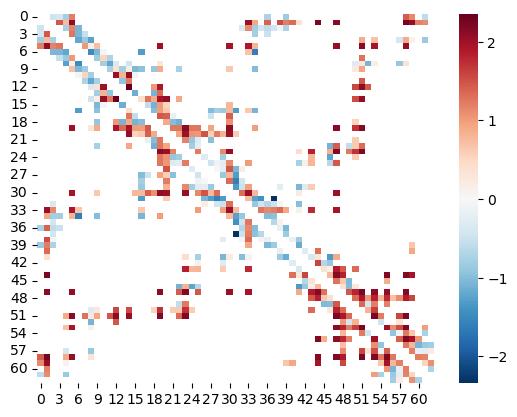

In [9]:
sns.heatmap(AWSEM_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

<AxesSubplot: >

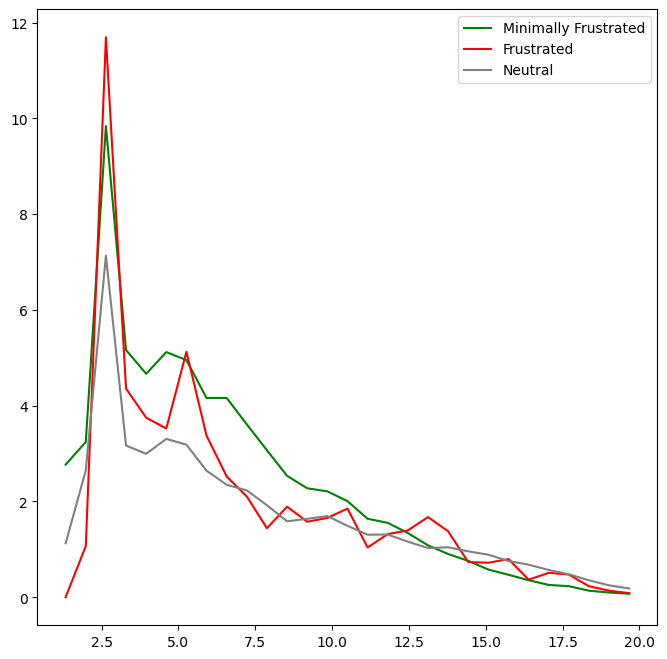

In [10]:
mutational_pair_distribution_data=AWSEM_model.generate_frustration_pair_distribution(kind="mutational")

plt.figure(figsize=(8,8))

sns.lineplot(x=mutational_pair_distribution_data[-1],y=mutational_pair_distribution_data[0],label="Minimally Frustrated",color="green")
sns.lineplot(x=mutational_pair_distribution_data[-1],y=mutational_pair_distribution_data[1],label="Frustrated",color="red")
sns.lineplot(x=mutational_pair_distribution_data[-1],y=mutational_pair_distribution_data[2],label="Neutral",color="gray")

### Configurational Frustration

In [11]:
AWSEM_model.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<AxesSubplot: >

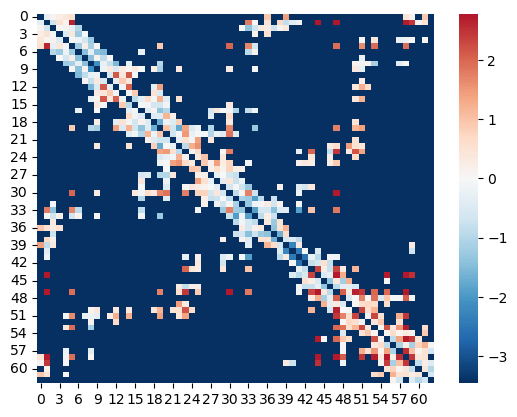

In [12]:
sns.heatmap(AWSEM_model.frustration(kind='configurational'),cmap='RdBu_r',center=0)

<AxesSubplot: >

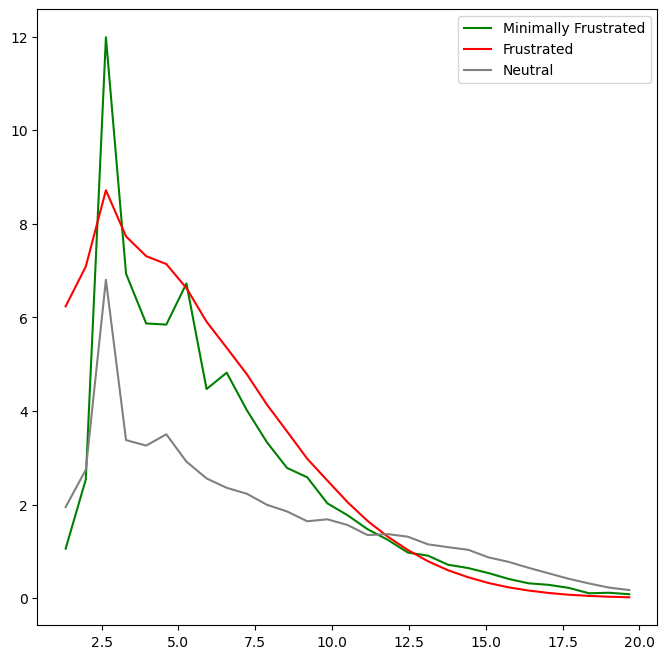

In [13]:
configurational_pair_distribution_data=AWSEM_model.generate_frustration_pair_distribution(kind="configurational")

plt.figure(figsize=(8,8))

sns.lineplot(x=configurational_pair_distribution_data[-1],y=configurational_pair_distribution_data[0],label="Minimally Frustrated",color="green")
sns.lineplot(x=configurational_pair_distribution_data[-1],y=configurational_pair_distribution_data[1],label="Frustrated",color="red")
sns.lineplot(x=configurational_pair_distribution_data[-1],y=configurational_pair_distribution_data[2],label="Neutral",color="gray")

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [14]:
#AWSEM parameters are chosen to be consistent with online AWSEM server
#Use original pdb residue numbering when providing initial and final indices.
structure=frustratometer.Structure('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")

#Burial energy of segment is measured in context of remainder of protein.
AWSEM_model_burial_context_included=frustratometer.AWSEM(structure,k_electrostatics=0.0,min_sequence_separation_rho=3, min_sequence_separation_contact=2)

#Burial energy of segment is NOT measured in context of remainder of protein.
AWSEM_model=frustratometer.AWSEM(structure,burial_in_context=False,k_electrostatics=0.0,min_sequence_separation_rho=3, min_sequence_separation_contact=2)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm8/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  warnings.warn(
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.


[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]
[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]


### Single Residue Frustration

In [15]:
AWSEM_model_burial_context_included.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
AWSEM_model.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Mutational Frustration

In [17]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/frustratometer/frustration/frustration.py:716: RuntimeWarning: invalid value encountered in divide
  contact_frustration = -mean_energy / (std_energy + correction)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
AWSEM_model.view_pair_frustration(pair="mutational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Configurational Frustration

In [19]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
AWSEM_model.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Cytochrome C (PDB: 1CYC)

In [21]:
#AWSEM parameters are chosen to be consistent with online AWSEM server
#Use original pdb residue numbering when providing initial and final indices.
structure=frustratometer.Structure('./data/1cyc.pdb',"A",repair_pdb=True, seq_selection="resindex `0to50`")

#Burial energy of segment is measured in context of remainder of protein.
AWSEM_model_burial_context_included=frustratometer.AWSEM(structure,k_electrostatics=0.0,min_sequence_separation_rho=3, min_sequence_separation_contact=2)

#Burial energy of segment is NOT measured in context of remainder of protein.
AWSEM_model=frustratometer.AWSEM(structure,burial_in_context=False,k_electrostatics=0.0,min_sequence_separation_rho=3, min_sequence_separation_contact=2)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/envs/openmm8/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  warnings.warn(
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.02s.


[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]
[0.839477 0.937289 0.957784 ... 1.       0.37531  0.86844 ]


### Single Residue Frustration

In [22]:
AWSEM_model_burial_context_included.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
AWSEM_model.view_single_frustration()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Mutational Frustration

In [24]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/frustratometer/frustration/frustration.py:716: RuntimeWarning: invalid value encountered in divide
  contact_frustration = -mean_energy / (std_energy + correction)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
AWSEM_model.view_pair_frustration(pair="mutational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Configurational Frustration

In [26]:
AWSEM_model_burial_context_included.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [27]:
AWSEM_model.view_pair_frustration(pair="configurational")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.